# An Example

## Preprocessing

### Original dataset

Original image and segmentation


Text(0.5, 0, 'image label')

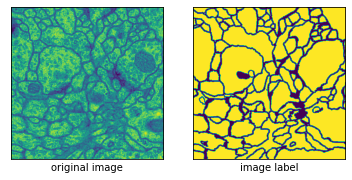

In [60]:
# read images and labels
# transfer png to nifti file; if not need to save, keep save_nii=False
from DataFunctions import * # function generate nifti file from images, writen by us
import matplotlib.pylab as plt
# save original training set
image_original = img2nii('./data_aug/membrane/train/image0/',save_nii=True,
                 image_prefix='.',save_name = 'training_original',
                save_path='./data_aug/')
label_original = img2nii('./data_aug/membrane/train/label0/',save_nii=True,
                 image_prefix='.',save_name = 'label_original',
                save_path='./data_aug/')
# show original image and segmentation
print('Original image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_original[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('original image')
plt.subplot(122)
plt.imshow(label_original[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

In [61]:
# separate original dataset into training set and test set;
import os
import numpy as np
import shutil
ratio = 0.7
# index_training0 = np.random.choice(image_original.shape[-1],
#                                    int(ratio*image_original.shape[-1]),replace=False)
# index_test0 = [i for i in np.arange(image_original.shape[-1]) if i not in index_training0]
index_training0 = np.array([0,1,2,5,8,9,10,11,12,13,15,16,17,18,20,21,23,24,26,28,29])
index_test0 = np.array([3,4,6,7,14,19,22,25,27])
# training set
img_train_0 = image_original[:,:,index_training0]
label_train_0 = label_original[:,:,index_training0]
# testing set
img_test_0 = image_original[:,:,index_test0]
label_test_0 = label_original[:,:,index_test0]

# copy training image to training folder
sdr = './data_aug/membrane/train/image0/'
tdr = './data_aug/membrane/train/image/'
shutil.rmtree(tdr)
os.mkdir(tdr)
for i_image in index_training0:
    shutil.copyfile(sdr+str(i_image)+'.png', 
                    tdr+str(i_image)+'.png')
#
sdr = './data_aug/membrane/train/label0/'
tdr = './data_aug/membrane/train/label/'
shutil.rmtree(tdr)
os.mkdir(tdr)
for i_image in index_training0:
    shutil.copyfile(sdr+str(i_image)+'.png', 
                    tdr+str(i_image)+'.png')
# copy test image to test folder
sdr = './data_aug/membrane/train/image0/'
tdr = './data_aug/membrane/test/'
shutil.rmtree(tdr)
os.mkdir(tdr)
for i_image in index_test0:
    shutil.copyfile(sdr+str(i_image)+'.png', 
                    tdr+str(i_image)+'.png')
#
sdr = './data_aug/membrane/train/label0/'
tdr = './data_aug/membrane/test_label/'
shutil.rmtree(tdr)
os.mkdir(tdr)
for i_image in index_test0:
    shutil.copyfile(sdr+str(i_image)+'.png', 
                    tdr+str(i_image)+'.png')


### Data augmentation

In [78]:
# Data augmentation
# Generate images
# def img_aug_gen(num)
sdr = './data_aug/membrane/train/aug/'
tdr = './data_aug/membrane/train/aug/'
shutil.rmtree(tdr)
os.mkdir(tdr)
#---------
data_gen_args = dict(rotation_range=20,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
Image_generated = ImageGenerator(batch_size=21,train_path='data_aug/membrane/train',
               image_folder='image',mask_folder='label',aug_dict=data_gen_args,
               image_color_mode = "grayscale",mask_color_mode = "grayscale",
               image_save_prefix  = "image",mask_save_prefix  = "mask",
                     flag_multi_class = False,num_class = 2,
               save_to_dir = './data_aug/membrane/train/aug/',target_size=(388,388),seed = 1)
num_batch = 9
for i,batch in enumerate(Image_generated):
    if(i >= num_batch):
        break

Found 21 images belonging to 1 classes.
Found 21 images belonging to 1 classes.


augmentated image and segmentation


Text(0.5, 0, 'image label')

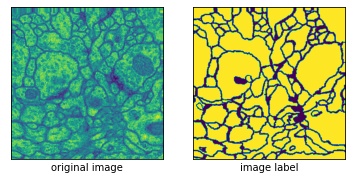

In [79]:
# save generated images
image_aug = img2nii('./data_aug/membrane/train/aug/',save_nii=False,
                 image_prefix='image',save_name = 'training_aug',
                save_path='./data_aug/')
label_aug = img2nii('./data_aug/membrane/train/aug/',save_nii=False,
                 image_prefix='mask',save_name = 'label_aug',
                save_path='./data_aug/')
# show augmentated image and segmentation
print('augmentated image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_aug[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('original image')
plt.subplot(122)
plt.imshow(label_aug[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Data nomalization

Normalized image and segmentation


Text(0.5, 0, 'image label')

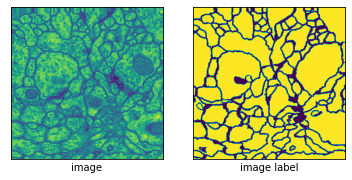

In [80]:
# normalized images
image_norm = imgNormlize(folder='./data_aug/membrane/train/aug/',
                     image_prefix='image',mask=False,
                     save_name= 'test',save_nii=False,
            save_path='./data_aug/')
# normalized mask
label_norm = imgNormlize(folder='./data_aug/membrane/train/aug/',
                     image_prefix='mask',mask=True,
                     save_name= 'test',save_nii=False,
            save_path='./data_aug/')
# show normalized image and segmentation
print('Normalized image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_norm[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image')
plt.subplot(122)
plt.imshow(label_norm[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Test data preprocessing

In [81]:
# save original test set
test_original = img2nii('./data_aug/membrane/test/',save_nii=False,
                 image_prefix='.',save_name = 'test_original',
                save_path='./data_aug/')
test_label_original = img2nii('./data_aug/membrane/test_label/',save_nii=False,
                 image_prefix='.',save_name = 'test_label_original',
                save_path='./data_aug/')

from scipy.ndimage import zoom
test_norm = zoom(test_original, (388/512, 388/512, 1),mode='nearest')/255
array_input = test_norm
array2nii(array_input,'test_norm','./data_aug/')

test_label_norm = zoom(test_label_original, (388/512, 388/512, 1),mode='nearest')/255
test_label_norm[test_label_norm>0.5] = 1
test_label_norm[test_label_norm<=0.5] = 0
array_input = test_label_norm
array2nii(array_input,'test_label_norm','./data_aug/')

## UNet model in the paper

### UNet model constructions
* See functions in DataFunctions.py

## UNet training and prediction

In [82]:
from UNet2D import *
model = UNet2d()
model_checkpoint = ModelCheckpoint('unet_membrane'+str(num_batch)+'.hdf5', monitor='loss',verbose=1,
                                   save_best_only=True)
imgs_train = image_norm.swapaxes(1,2).swapaxes(0,1)
imgs_mask = label_norm.swapaxes(1,2).swapaxes(0,1)
model.fit(imgs_train, imgs_mask, batch_size=10, epochs=5, verbose=1,validation_split=0.2,
          shuffle=True, callbacks=[model_checkpoint])

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 388, 388, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.compat.v1.pad_19 (TFOpLambd  (None, 572, 572, 1)  0          ['input_20[0][0]']               
 a)                                                                                               
                                                                                                  
 conv2d_361 (Conv2D)            (None, 570, 570, 64  640         ['tf.compat.v1.pad_19[0][0]']    
                                )                                                              

                                6)                                'conv2d_transpose_78[0][0]']    
                                                                                                  
 conv2d_375 (Conv2D)            (None, 198, 198, 12  295040      ['concatenate_78[0][0]']         
                                8)                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 196, 196, 12  147584      ['conv2d_375[0][0]']             
                                8)                                                                
                                                                                                  
 center_crop_95 (CenterCrop)    (None, 392, 392, 64  0           ['conv2d_362[0][0]']             
                                )                                                                 
          

## Prediction

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 388, 388, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.compat.v1.pad_20 (TFOpLambd  (None, 572, 572, 1)  0          ['input_21[0][0]']               
 a)                                                                                               
                                                                                                  
 conv2d_380 (Conv2D)            (None, 570, 570, 64  640         ['tf.compat.v1.pad_20[0][0]']    
                                )                                                              

                                6)                                'conv2d_transpose_82[0][0]']    
                                                                                                  
 conv2d_394 (Conv2D)            (None, 198, 198, 12  295040      ['concatenate_82[0][0]']         
                                8)                                                                
                                                                                                  
 conv2d_395 (Conv2D)            (None, 196, 196, 12  147584      ['conv2d_394[0][0]']             
                                8)                                                                
                                                                                                  
 center_crop_100 (CenterCrop)   (None, 392, 392, 64  0           ['conv2d_381[0][0]']             
                                )                                                                 
          

/tmp/ipykernel_641636/865725535.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(test_input,30,verbose=1)
2022-04-26 01:07:36.098049: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: UNet/center_crop_100/cond/branch_executed/_39


30/30 [==============================] - 5s 157ms/step


Text(0.5, 0, 'image label')

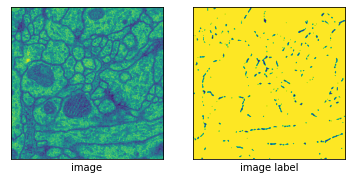

In [83]:
# prediction
model = UNet2d()
model.load_weights('unet_membrane'+str(num_batch)+'.hdf5')
test_input = test_norm.swapaxes(1,2).swapaxes(0,1)
results = model.predict_generator(test_input,30,verbose=1)
# save results
prediction = np.squeeze(results).swapaxes(0,1).swapaxes(1,2)
prediction[prediction>0.5] = 1
prediction[prediction<=0.5] = 0
array2nii(prediction,'test_prediction'+str(num_batch),'./data_aug/')
# show prediction
plt.figure()
plt.subplot(121)
plt.imshow(test_norm[:,:,1])
plt.xticks([])
plt.yticks([])
plt.xlabel('image')
plt.subplot(122)
plt.imshow(prediction[:,:,1])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

In [84]:
import keras.backend as K
from sklearn.metrics import accuracy_score
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [85]:
Dice_score = dice_coef(test_label_norm.astype(np.float32),prediction)
accuracy = accuracy_score(test_label_norm.astype(np.float32).flatten(),prediction.flatten())

print('Dice_score: ',Dice_score.numpy())
print('Accuracy: ',accuracy)

Dice_score:  0.8936083
Accuracy:  0.8163895974303563
